<a href="https://colab.research.google.com/github/guptaharsh-in/Algo_Trading_Startegy_using_Python/blob/main/Algo_Trading_Startegy_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dual Moving Average Crossover Strategy to determine when to Buy and Sell

In [81]:
#Install library nsepy if necessary
#pip install nsepy

In [82]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import nsepy as nse

In [84]:
# Load and Store Data from National Stock Exchange(NSE)
data = nse.get_history("BANKNIFTY", start = date(2018,1,1), end = date(2023,1,1), index=True)

In [85]:
data

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2018-01-01,25565.75,25588.00,25271.55,25318.10,57576913.0,2.037550e+10
2018-01-02,25382.20,25425.50,25232.80,25338.25,72033811.0,2.270360e+10
2018-01-03,25425.75,25454.90,25300.90,25318.60,59730356.0,1.958210e+10
2018-01-04,25367.65,25490.35,25310.30,25462.60,105995860.0,2.646620e+10
2018-01-05,25524.45,25643.35,25499.55,25601.85,123622612.0,3.188080e+10
...,...,...,...,...,...,...
2022-12-26,41716.35,42846.15,41569.45,42630.15,323172447.0,5.974960e+10
2022-12-27,42827.75,42927.20,42394.15,42859.50,229631139.0,4.073470e+10
2022-12-28,42733.60,43034.95,42694.85,42827.70,230529712.0,4.905600e+10


In [86]:
# Convert to Dataframe
data = data.Close.to_frame().dropna()
data

,Close
Date,
2018-01-01,25318.10
2018-01-02,25338.25
2018-01-03,25318.60
2018-01-04,25462.60
2018-01-05,25601.85
...,...
2022-12-26,42630.15
2022-12-27,42859.50
2022-12-28,42827.70


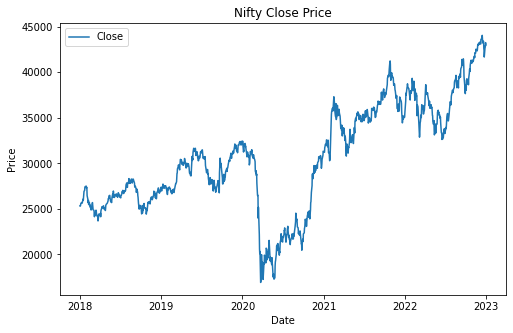

In [87]:
data.plot(figsize= (8,5),ylabel = "Price", title= "Nifty Close Price")

In [88]:
# Generate Moving Averages Columns
data["sma_s"] = data.Close.rolling(20).mean()
data["sma_l"] = data.Close.rolling(100).mean()
data


,Close,sma_s,sma_l
Date,,,
2018-01-01,25318.10,NaN,NaN
2018-01-02,25338.25,NaN,NaN
2018-01-03,25318.60,NaN,NaN
2018-01-04,25462.60,NaN,NaN
2018-01-05,25601.85,NaN,NaN
...,...,...,...
2022-12-26,42630.15,43198.4825,40736.923
2022-12-27,42859.50,43188.7850,40786.486
2022-12-28,42827.70,43168.6200,40834.523


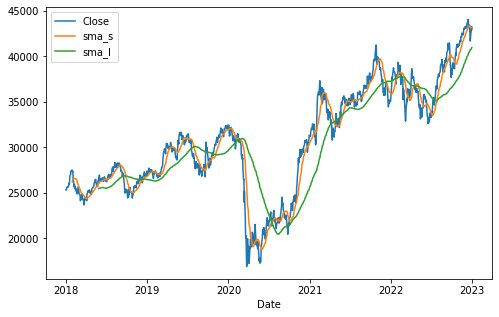

In [89]:
data.plot(figsize= (8,5))

In [90]:
data.reset_index(inplace=True)
data

,Date,Close,sma_s,sma_l
0,2018-01-01,25318.10,NaN,NaN
1,2018-01-02,25338.25,NaN,NaN
2,2018-01-03,25318.60,NaN,NaN
3,2018-01-04,25462.60,NaN,NaN
4,2018-01-05,25601.85,NaN,NaN
...,...,...,...,...
1234,2022-12-26,42630.15,43198.4825,40736.923
1235,2022-12-27,42859.50,43188.7850,40786.486
1236,2022-12-28,42827.70,43168.6200,40834.523
1237,2022-12-29,43252.35,43168.2050,40887.154


In [91]:
# Create Buy and Sell Function
def buy_sell(data):
  sigbuy =[]
  sigsell =[]
  flag = -1

  for i in range(len(data)):
    if data["sma_s"][i]>data["sma_l"][i]:
      if flag!= 1:
        sigbuy.append(data["Close"][i])
        sigsell.append(np.nan)
        flag= 1
      else:
        sigbuy.append(np.nan)
        sigsell.append(np.nan)
    elif data["sma_s"][i]<data["sma_l"][i]:
      if flag!= 0:
        sigbuy.append(np.nan)
        sigsell.append(data["Close"][i])
        flag= 0
      else:
        sigbuy.append(np.nan)
        sigsell.append(np.nan)
    else:
        sigbuy.append(np.nan)
        sigsell.append(np.nan)

  return (sigbuy,sigsell)

In [92]:
# Store Buy and Sell in a Variable
buy_sell= buy_sell(data)
data["buy_signal"] = buy_sell[0]
data["sell_signal"] = buy_sell[1]

In [93]:
data

,Date,Close,sma_s,sma_l,buy_signal,sell_signal
0,2018-01-01,25318.10,NaN,NaN,NaN,NaN
1,2018-01-02,25338.25,NaN,NaN,NaN,NaN
2,2018-01-03,25318.60,NaN,NaN,NaN,NaN
3,2018-01-04,25462.60,NaN,NaN,NaN,NaN
4,2018-01-05,25601.85,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1234,2022-12-26,42630.15,43198.4825,40736.923,NaN,NaN
1235,2022-12-27,42859.50,43188.7850,40786.486,NaN,NaN
1236,2022-12-28,42827.70,43168.6200,40834.523,NaN,NaN
1237,2022-12-29,43252.35,43168.2050,40887.154,NaN,NaN


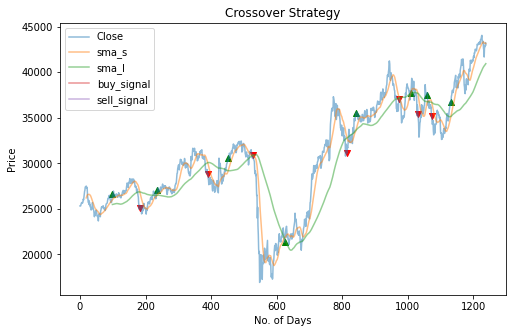

In [95]:
# Visualize the Strategy
%matplotlib inline
data.plot(figsize= (8,5), ylabel= "Price",xlabel= "No. of Days", title = "Crossover Strategy",alpha= .5)
plt.scatter(data.index, data["buy_signal"], label = "Buy", marker = "^", color = "green")
plt.scatter(data.index, data["sell_signal"], label = "Sell", marker = "v", color = "red")